Function to scrape article text. We will use this a few cells down, I'm just putting it up here for now...

In [ ]:
def scrape_article_text(article_url):
    try:
        article_response = requests.get(article_url)
        if article_response.status_code == 200:
            # Parse the HTML content
            soup = BeautifulSoup(article_response.content, 'html.parser')

            # Try to find the main article text (this can vary between websites)
            # Common tags for article content: <p>, <div>, <article>
            paragraphs = soup.find_all('p')  # maybe change this on a site by site basis...

            # Extract and concatenate the text from the paragraphs
            article_text = ' '.join([para.get_text() for para in paragraphs])

            return article_text if article_text else "No text found"
        else:
            return f" {article_response.status_code}"

    except Exception as e:
        return f"{str(e)}"

# This is the code for scraping stuff from newsdata for Donald Trump, from Brazil

In [ ]:
import requests
import json

API_KEY = 'pub_55702c18b53ffe44e9002230d46fcdd15ff83'

url = 'https://newsdata.io/api/1/news'

params = {
    'apikey': API_KEY,
    'q': 'Donald Trump',
    'country': 'br',  # country code for Brazil
    'language': 'pt',  # Portuguese language for Brazil
}

response = requests.get(url, params=params)


if response.status_code == 200:
    data_trump = response.json()

    #print(data)

    if 'results' in data_trump:
        articles_trump = data_trump['results']
        for i, article in enumerate(articles_trump, 1):
            print(f"Article {i}:")
            print(f"Title: {article.get('title')}")
            print(f"Description: {article.get('description')}")
            print(f"Published At: {article.get('pubDate')}")
            print(f"Source: {article.get('source_id')}")
            print(f"Link: {article.get('link')}")
            print("-" * 50)
    else:
        print("No articles found.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")



Article 1:
Title: EUA: comício de Donald Trump tem piada racista sobre Porto Rico
Description: Chamado para falar antes do discurso de Donald Trump durante um ato realizado na noite deste domingo, 27, no Madison Square Garden, em Nova York, um comediante descreveu Porto Rico como uma "ilha flutuante de lixo". "Não sei se vocês sabem, mas há literalmente uma ilha flutuante de lixo no meio do oceano agora. Acho que é chamada Porto Rico", disse o comediante Tony Hinchcliffe, do podcast "Kill Tony".Mais tarde, a campanha de Trump desautorizou a fala. "Esta piada não reflete as visões do presidente Trump ou da campanha", disse a conselheira sênior Danielle Alvarez em um comunicado. O comunicado não desautorizou outros comentários grosseiros e insultos proferidos por outros apoiadores de Trump contra latinos, judeus e negros, todos eleitorados-chave na eleição prevista para o dia 5 de novembro.Amigo de infância de Trump, David Rem, referiu-se a Kamala Harris como "o anticristo" 

# This is similar code for Kamala Harris

In [ ]:
params = {
    'apikey': API_KEY,
    'q': 'Kamala Harris',
    'country': 'br',  # country code for Brazil
    'language': 'pt',  # Portuguese language for Brazil
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data_harris = response.json()

    if 'results' in data_harris:
        articles_harris = data_harris['results']
        for i, article in enumerate(articles_harris, 1):
            print(f"Article {i}:")
            print(f"Title: {article.get('title')}")
            print(f"Description: {article.get('description')}")
            print(f"Published At: {article.get('pubDate')}")
            print(f"Source: {article.get('source_id')}")
            print(f"Link: {article.get('link')}")
            print("-" * 50)
    else:
        print("No articles found.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")


Article 1:
Title: EUA: comício de Donald Trump tem piada racista sobre Porto Rico
Description: Chamado para falar antes do discurso de Donald Trump durante um ato realizado na noite deste domingo, 27, no Madison Square Garden, em Nova York, um comediante descreveu Porto Rico como uma "ilha flutuante de lixo". "Não sei se vocês sabem, mas há literalmente uma ilha flutuante de lixo no meio do oceano agora. Acho que é chamada Porto Rico", disse o comediante Tony Hinchcliffe, do podcast "Kill Tony".Mais tarde, a campanha de Trump desautorizou a fala. "Esta piada não reflete as visões do presidente Trump ou da campanha", disse a conselheira sênior Danielle Alvarez em um comunicado. O comunicado não desautorizou outros comentários grosseiros e insultos proferidos por outros apoiadores de Trump contra latinos, judeus e negros, todos eleitorados-chave na eleição prevista para o dia 5 de novembro.Amigo de infância de Trump, David Rem, referiu-se a Kamala Harris como "o anticristo" 

This actually gets the article text, the above just gets links

In [ ]:
from bs4 import BeautifulSoup

harris_texts = []
trump_texts = []

for i, article in enumerate(articles_harris, 1):
    article_url = article.get('link')
    article_text = scrape_article_text(article_url)
    harris_texts.append(article_text)
    print(f"Article Text: {article_text}")

for i, article in enumerate(articles_trump, 1):
    article_url = article.get('link')
    article_text = scrape_article_text(article_url)
    trump_texts.append(article_text)
    print(f"Article Text: {article_text}")


Article Text:   





 Esqueci minha senha Não tem conta? Acesse e saiba como! Confirme alguns dados para seu primeiro acesso ao clube de vantagens: Escute essa reportagem Chamado para falar antes do discurso de Donald Trump durante um ato realizado na noite deste domingo, 27, no Madison Square Garden, em Nova York, um comediante descreveu Porto Rico como uma "ilha flutuante de lixo". "Não sei se vocês sabem, mas há literalmente uma ilha flutuante de lixo no meio do oceano agora. Acho que é chamada Porto Rico", disse o comediante Tony Hinchcliffe, do podcast "Kill Tony". Mais tarde, a campanha de Trump desautorizou a fala. "Esta piada não reflete as visões do presidente Trump ou da campanha", disse a conselheira sênior Danielle Alvarez em um comunicado. O comunicado não desautorizou outros comentários grosseiros e insultos proferidos por outros apoiadores de Trump contra latinos, judeus e negros, todos eleitorados-chave na eleição prevista para o dia 5 de novembro. Amigo de infância de

In [ ]:
with open("harris_texts.txt", "w") as harris_file:
    for article_text in harris_texts:
        harris_file.write(article_text + "\n\n")

with open("trump_texts.txt", "w") as trump_file:
    for article_text in trump_texts:
        trump_file.write(article_text + "\n\n")

installing word cloud library

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get the stopwords for the specified language
    stop_words = set(stopwords.words("portuguese"))

    stop_words.add("estado")

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


create combined text

In [ ]:


trump_comb_text = ""
for i in trump_texts:
  trump_comb_text += i

trump_comb_text = remove_stopwords(trump_comb_text)

harris_comb_text = ""
for i in harris_texts:
  harris_comb_text += i

harris_comb_text = remove_stopwords(harris_comb_text)


RUN IT FROM HERE IF YOU WANT TO REPLICATW THE WORDCOULD FROM OUR ARTICLE
Dont run this cell if you are scraping your own data

In [1]:
!pip install wordcloud matplotlib

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get the stopwords for the specified language
    stop_words = set(stopwords.words("portuguese"))

    stop_words.add("estado")

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

# Read the content of each file and store in respective variables
with open("brazil_harris_texts.txt", "r") as file:
    harris_comb_text = remove_stopwords(file.read())

with open("brazil_trump_texts.txt", "r") as file:
    trump_comb_text = remove_stopwords(file.read())

# Display first 500 characters of each variable as a check
print("Harris Texts Sample:")
print(harris_comb_text[:500])

print("\nTrump Texts Sample:")
print(trump_comb_text[:500])


Harris Texts Sample:
Esqueci senha conta ? Acesse saiba ! Confirme alguns dados primeiro acesso clube vantagens : Escute reportagem pouco semana eleições Estados Unidos , pesquisas intenções votos modelos matemáticos continuam mostrando corrida acirrada ex-presidente Donald Trump vice-presidente Kamala Harris . menos três sondagens últimos dias mostraram dois numericamente empatados nível nacional . Segundo agregado levantamentos RealClear Polling , Trump aparece 48,5 % preferência eleitorado , vantagem marginal 0,1

Trump Texts Sample:
Esqueci senha conta ? Acesse saiba ! Confirme alguns dados primeiro acesso clube vantagens : Escute reportagem pouco semana eleições Estados Unidos , pesquisas intenções votos modelos matemáticos continuam mostrando corrida acirrada ex-presidente Donald Trump vice-presidente Kamala Harris . menos três sondagens últimos dias mostraram dois numericamente empatados nível nacional . Segundo agregado levantamentos RealClear Polling , Trump aparece 48,5 % pre

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# Read the content of each file and store in respective variables
with open("brazil_harris_texts.txt", "r") as file:
    harris_comb_text = remove_stopwords(file.read())

with open("brazil_trump_texts.txt", "r") as file:
    trump_comb_text = remove_stopwords(file.read())


show word clouds and word frequency YAY!

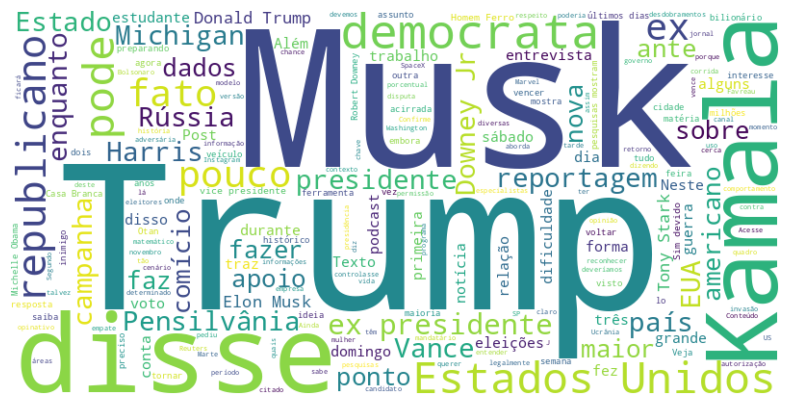

--------------------------------------------------


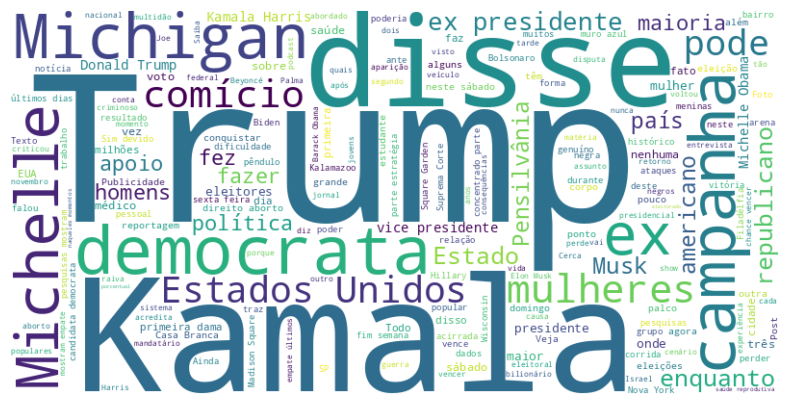

--------------------------------------------------
Word: Trump, Frequency: 1.0
Word: Musk, Frequency: 0.8888888888888888
Word: disse, Frequency: 0.7222222222222222
Word: Kamala, Frequency: 0.6111111111111112
Word: democrata, Frequency: 0.6111111111111112
Word: pode, Frequency: 0.5
Word: Estados Unidos, Frequency: 0.5
Word: republicano, Frequency: 0.4444444444444444
Word: pouco, Frequency: 0.3888888888888889
Word: ex, Frequency: 0.3888888888888889
Word: fato, Frequency: 0.3888888888888889
Word: ex presidente, Frequency: 0.3888888888888889
Word: reportagem, Frequency: 0.3333333333333333
Word: presidente, Frequency: 0.3333333333333333
Word: Harris, Frequency: 0.3333333333333333
Word: Michigan, Frequency: 0.3333333333333333
Word: Pensilvânia, Frequency: 0.3333333333333333
Word: Vance, Frequency: 0.3333333333333333
Word: Rússia, Frequency: 0.3333333333333333
Word: EUA, Frequency: 0.3333333333333333
Word: país, Frequency: 0.3333333333333333
Word: enquanto, Frequency: 0.3333333333333333
Word:

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_trump = WordCloud(width=800, height=400, background_color='white').generate(trump_comb_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_trump, interpolation='bilinear')  # Display the generated image
plt.axis('off')
plt.show()  # Show the plot

print("-" * 50)

wordcloud_harris = WordCloud(width=800, height=400, background_color='white').generate(harris_comb_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_harris, interpolation='bilinear')
plt.axis('off')
plt.show()  # Show the plot

print("-" * 50)

words_frequencies_trump = wordcloud_trump.words_
for word, freq in words_frequencies_trump.items():
    print(f"Word: {word}, Frequency: {freq}")

print("-" * 50)

words_frequencies_harris = wordcloud_harris.words_
for word, freq in words_frequencies_harris.items():
    print(f"Word: {word}, Frequency: {freq}")


In [9]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.0 MB/s eta 0:00:00


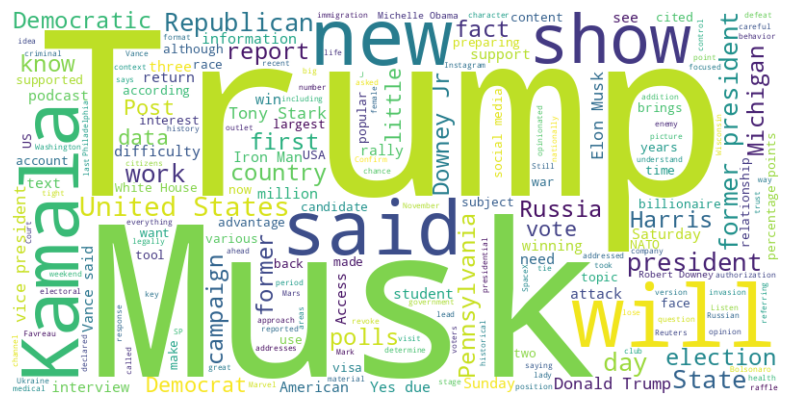

--------------------------------------------------


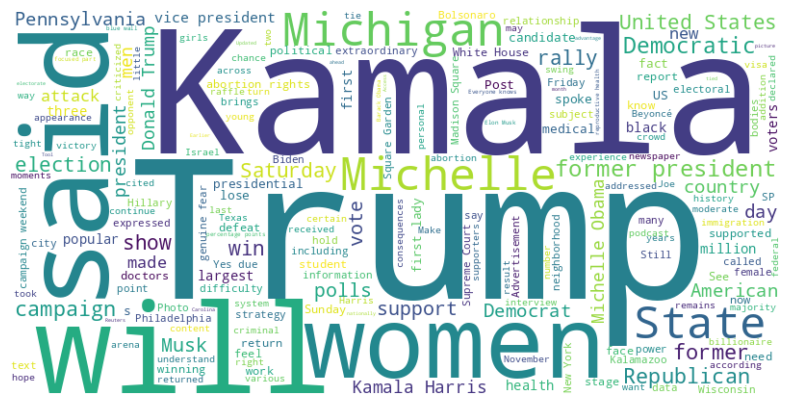

--------------------------------------------------
Word: Trump, Frequency: 1.0
Word: Musk, Frequency: 0.8421052631578947
Word: will, Frequency: 0.6842105263157895
Word: Kamala, Frequency: 0.5789473684210527
Word: new, Frequency: 0.5789473684210527
Word: said, Frequency: 0.5263157894736842
Word: show, Frequency: 0.42105263157894735
Word: United States, Frequency: 0.42105263157894735
Word: president, Frequency: 0.3684210526315789
Word: Republican, Frequency: 0.3684210526315789
Word: work, Frequency: 0.3684210526315789
Word: day, Frequency: 0.3684210526315789
Word: State, Frequency: 0.3684210526315789
Word: former president, Frequency: 0.3684210526315789
Word: know, Frequency: 0.3157894736842105
Word: first, Frequency: 0.3157894736842105
Word: report, Frequency: 0.3157894736842105
Word: polls, Frequency: 0.3157894736842105
Word: former, Frequency: 0.3157894736842105
Word: Harris, Frequency: 0.3157894736842105
Word: election, Frequency: 0.3157894736842105
Word: Michigan, Frequency: 0.31578

In [10]:
from deep_translator import GoogleTranslator

# Function to split the text into smaller chunks
def split_text(text, max_length):
    words = text.split(' ')
    chunks = []
    current_chunk = []

    for word in words:
        if len(' '.join(current_chunk + [word])) <= max_length:
            current_chunk.append(word)
        else:
            chunks.append(' '.join(current_chunk))
            current_chunk = [word]
    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

#limiting the amount of characters to translate a time to stay within API limits
max_chars_per_chunk = 2000
harris_chunks = split_text(harris_comb_text, max_chars_per_chunk)
trump_chunks = split_text(trump_comb_text, max_chars_per_chunk)

translator = GoogleTranslator(source='auto', target='en')

def translate_chunks(chunks):
    translated_chunks = []
    for chunk in chunks:
        try:
            translated_chunk = translator.translate(chunk)
            translated_chunks.append(translated_chunk)
        except Exception as e:
            print(f"Translation error: {e}")
            translated_chunks.append("")
    return translated_chunks


#joining the chunks into one string
translated_harris_chunks = translate_chunks(harris_chunks)
english_harris = ' '.join(translated_harris_chunks)

translated_trump_chunks = translate_chunks(trump_chunks)
english_trump = ' '.join(translated_trump_chunks)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_trump = WordCloud(width=800, height=400, background_color='white').generate(english_trump)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_trump, interpolation='bilinear')
plt.axis('off')
plt.show()

print("-" * 50)

#create wordcloud

wordcloud_harris = WordCloud(width=800, height=400, background_color='white').generate(english_harris)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_harris, interpolation='bilinear')
plt.axis('off')
plt.show()

print("-" * 50)
words_frequencies_trump = wordcloud_trump.words_
for word, freq in words_frequencies_trump.items():
    print(f"Word: {word}, Frequency: {freq}")

print("-" * 50)
words_frequencies_harris = wordcloud_harris.words_
for word, freq in words_frequencies_harris.items():
    print(f"Word: {word}, Frequency: {freq}")
